# Data cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load csv
jfk = pd.read_csv('/content/JFK_flight_data.csv')

# Drop null values
jfk = jfk.dropna()

# One-hot encoding for categorical variables
one_hot = pd.get_dummies(jfk['OP_UNIQUE_CARRIER'])
jfk = jfk.drop('OP_UNIQUE_CARRIER',axis = 1)
jfk = jfk.join(one_hot)

one_hot = pd.get_dummies(jfk['DEST'])
jfk = jfk.drop('DEST',axis = 1)
jfk = jfk.join(one_hot)

one_hot = pd.get_dummies(jfk['Wind'])
jfk = jfk.drop('Wind',axis = 1)
jfk = jfk.join(one_hot)

one_hot = pd.get_dummies(jfk['Condition'])
jfk = jfk.drop('Condition',axis = 1)
jfk = jfk.join(one_hot)

jfk.loc[jfk['MONTH']==1, 'MONTH'] = 'Jan'
jfk.loc[jfk['MONTH']==11, 'MONTH'] = 'Nov'
jfk.loc[jfk['MONTH']==12, 'MONTH'] = 'Dec'
one_hot = pd.get_dummies(jfk['MONTH'])
jfk = jfk.drop('MONTH', axis = 1)
jfk = jfk.join(one_hot)

# Drop unneeded columns
jfk = jfk.drop(columns = ['TAIL_NUM','DEP_TIME_M'])

# Change type of Dew Point column to int
jfk['Dew Point'] = jfk['Dew Point'].astype(int)
     
# Turn target column into a categorical variable based on whether the departure
#     delay is 15 minutes or more.

jfk['DEP_DELAY_CAT'] = jfk['DEP_DELAY'].apply(lambda x: 1 if x > 15 else 0)

# Drop original departure delay column

jfk = jfk.drop('DEP_DELAY', axis = 1)

# Train-test-validation split

In [3]:
# Train test validation split 

# Train-test split
from sklearn.model_selection import train_test_split

X,y = jfk.loc[:, jfk.columns != 'DEP_DELAY_CAT'], jfk.loc[:, 'DEP_DELAY_CAT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=604)

# Train-validation split

X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 604)

# Random forest classifier

In [9]:
# Tune hyperparameters for random forest classifier using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [2,5,10,100],
    'criterion' :['gini', 'entropy']
}

grid_cv = GridSearchCV(RandomForestClassifier(),
                       param_grid = param_grid, 
                       cv = 5,
                       scoring = 'f1')

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 100],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring='f1')

In [10]:
# Hyperparameters for the best model

grid_cv.best_params_

{'criterion': 'gini',
 'max_depth': 100,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [29]:
# Get validation set scores for the best hyperparameters
# Check accuracy score, precision, recall, f1 score

rfc = RandomForestClassifier(criterion='gini', 
                             max_depth=100, 
                             max_features = 'sqrt', 
                             n_estimators = 500)
model = rfc.fit(X_train_train, y_train_train)
pred = model.predict(X_val)

print('the accuracy is', accuracy_score(y_val, pred))
print('the precision is', precision_score(y_val, pred))
print('the recall is', recall_score(y_val, pred))
print('the f1 score is', f1_score(y_val, pred))

the accuracy is 0.885491216655823
the precision is 0.8725490196078431
the recall is 0.14735099337748345
the f1 score is 0.25212464589235123


Normalized Confusion Matrix for Random Forest Classifier




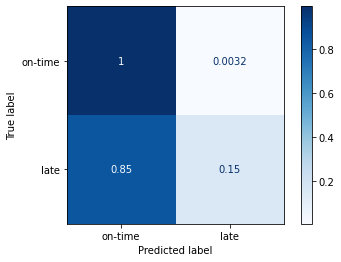

In [30]:
# Normalized confusion matrix for the model above

from sklearn.metrics import ConfusionMatrixDisplay

print('Normalized Confusion Matrix for Random Forest Classifier')
print('\n')

ConfusionMatrixDisplay.from_predictions(y_val, pred, 
                                        display_labels=['on-time','late'], 
                                        cmap=plt.cm.Blues,
                                        normalize = 'true')

In [13]:
# Fine-tune the hyperparameters

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [100,150,200],
    'criterion' :['gini', 'entropy']
}

grid_cv = GridSearchCV(RandomForestClassifier(),
                       param_grid = param_grid, 
                       cv = 5,
                       scoring = 'f1')

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [100, 150, 200],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring='f1')

In [14]:
# Hyperparameters for the best model

grid_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 100,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [27]:
# Get validation set scores for the best hyperparameters

rfc = RandomForestClassifier(criterion='entropy', 
                             max_depth=100, 
                             max_features = 'sqrt', 
                             n_estimators = 200)
model = rfc.fit(X_train_train, y_train_train)
pred = model.predict(X_val)

print('the accuracy is', accuracy_score(y_val, pred))
print('the precision is', precision_score(y_val, pred))
print('the recall is', recall_score(y_val, pred))
print('the f1 score is', f1_score(y_val, pred))

the accuracy is 0.8848405985686402
the precision is 0.8543689320388349
the recall is 0.1456953642384106
the f1 score is 0.24893917963224896


Normalized Confusion Matrix for Random Forest Classifier




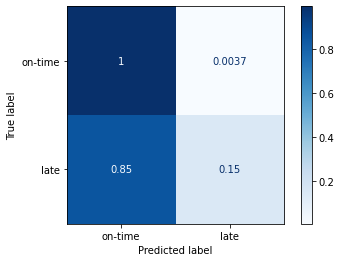

In [28]:
# Normalized confusion matrix for the model above

from sklearn.metrics import ConfusionMatrixDisplay

print('Normalized Confusion Matrix for Random Forest Classifier')
print('\n')

ConfusionMatrixDisplay.from_predictions(y_val, pred, 
                                        display_labels=['on-time','late'], 
                                        cmap=plt.cm.Blues,
                                        normalize = 'true')

In [16]:
# Fine-tune hyperparameters

param_grid = { 
    'n_estimators': [150, 200, 250],
    'max_features': ['sqrt'],
    'max_depth' : [80,90,100,110,120],
    'criterion' :['entropy']
}

grid_cv = GridSearchCV(RandomForestClassifier(),
                       param_grid = param_grid, 
                       cv = 5,
                       scoring = 'f1')

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [80, 90, 100, 110, 120],
                         'max_features': ['sqrt'],
                         'n_estimators': [150, 200, 250]},
             scoring='f1')

In [17]:
# Hyperparameters for the best model

grid_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 100,
 'max_features': 'sqrt',
 'n_estimators': 250}

In [25]:
# Get validation set scores for the best hyperparameters

rfc = RandomForestClassifier(criterion='entropy', 
                             max_depth=100, 
                             max_features = 'sqrt', 
                             n_estimators = 250)
model = rfc.fit(X_train_train, y_train_train)
pred = model.predict(X_val)

print('the accuracy is', accuracy_score(y_val, pred))
print('the precision is', precision_score(y_val, pred))
print('the recall is', recall_score(y_val, pred))
print('the f1 score is', f1_score(y_val, pred))

the accuracy is 0.884406853177185
the precision is 0.8380952380952381
the recall is 0.1456953642384106
the f1 score is 0.24823695345557123


Normalized Confusion Matrix for Random Forest Classifier




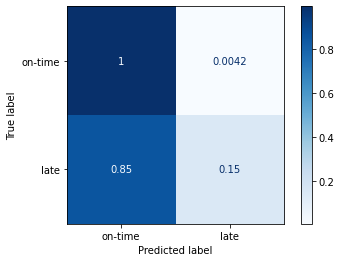

In [26]:
# Normalized confusion matrix for the model above

from sklearn.metrics import ConfusionMatrixDisplay

print('Normalized Confusion Matrix for Random Forest Classifier')
print('\n')

ConfusionMatrixDisplay.from_predictions(y_val, pred, 
                                        display_labels=['on-time','late'], 
                                        cmap=plt.cm.Blues,
                                        normalize = 'true')

In [22]:
# Get test error for the best model hyperparameters

rfc = RandomForestClassifier(criterion='entropy', 
                             max_depth=100, 
                             max_features = 'sqrt', 
                             n_estimators = 200)
model = rfc.fit(X_train, y_train)
pred = model.predict(X_test)

print('the accuracy is', accuracy_score(y_test, pred))
print('the precision is', precision_score(y_test, pred))
print('the recall is', recall_score(y_test, pred))
print('the f1 score is', f1_score(y_test, pred))

the accuracy is 0.871616932685635
the precision is 0.8413793103448276
the recall is 0.14541120381406436
the f1 score is 0.24796747967479676


Normalized Confusion Matrix for Random Forest Classifier on the Test Set




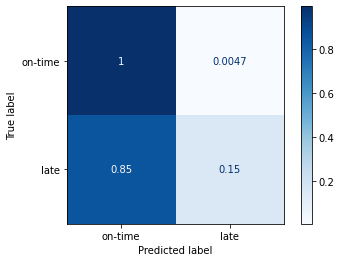

In [24]:
# Normalized confusion matrix for the test set 

from sklearn.metrics import ConfusionMatrixDisplay

print('Normalized Confusion Matrix for Random Forest Classifier on the Test Set')
print('\n')

ConfusionMatrixDisplay.from_predictions(y_test, pred, 
                                        display_labels=['on-time','late'], 
                                        cmap=plt.cm.Blues,
                                        normalize = 'true')